In [1]:
%matplotlib inline

## imports and setup
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import multivariate_normal

from matplotlib import animation, rc
from IPython.display import HTML

np.random.seed(42) ## seed the random generator so the notebook is reproducible 

font = {'size'   : 15}
matplotlib.rc('font', **font)

# Gaussian Processes


## Univariate Gaussians 

To evaluate the probability that the Gaussian assigns to an input location $y$, we use the formula:

$$ p(x|\mu,\sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} \exp \bigg\{ -\frac{1}{2\sigma^2}(x-\mu)^2\bigg\} $$

## Multivariate Gaussians

When we specify a *multivariate* Gaussian, we swap our scalar mean for a vector $\mathbf{\mu}$, defining one mean per variable.


$$ \mathbf{\mu} = \begin{bmatrix} \mu_{h} \\ \mu_{w} \\ \end{bmatrix} $$

To replace the variance ($\sigma$), we need to specify a _covariance matrix_ ($\Sigma$). The exact definition of the covariance of two variables is given by our choice of _covariance function_. The most common choice for the covariance function is the Radial Basis Function kernel. Given a pair of vectors $(x_i, x_j)$:

$$ K(x_i, x_j) = \exp \big(-\frac{\|x_i - x_j\|^2}{2 \sigma^2} \big) $$

We compute the covariance of each pair of points in our training set:

$$ \mathbf{\Sigma} = \begin{bmatrix} \Sigma(x_1, x_1) & \Sigma(x_1, x_2) \\ \Sigma(x_2, x_1) & \Sigma(x_2, x_2)  \\ \end{bmatrix} $$

/Users/jackturner/mambaforge/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


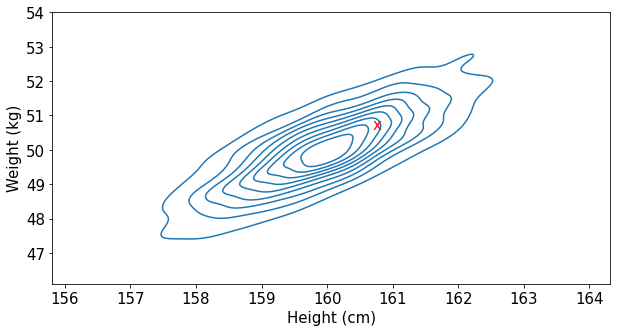

In [2]:
fig, ax = plt.subplots(figsize=(10,5))

### Positive covariance
mean = [160, 50]
cov  = [[1,.8],[.8,1]]  
x, y = np.random.multivariate_normal(mean, cov, 1000).T

s_x, s_y = np.random.multivariate_normal(mean, cov, 1).T

sns.kdeplot(x,y,ax=ax)

ax.annotate('x',(s_x,s_y),color='red')
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')

plt.show()

Because it's a Gaussian, if we condition on one specific height then we get another Gaussian:

/Users/jackturner/mambaforge/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


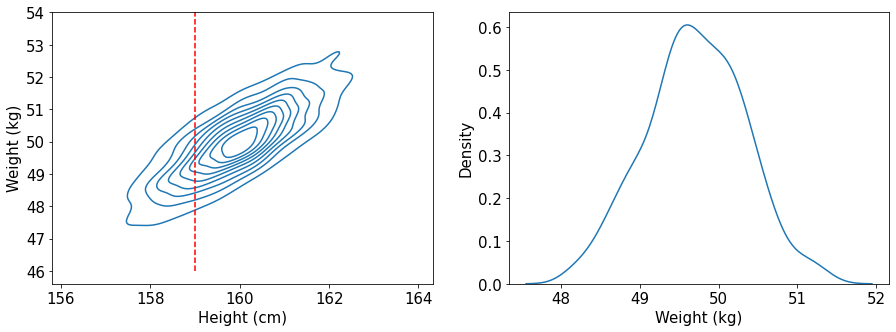

In [3]:
input_height = 159

fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.kdeplot(x,y,ax=ax[0])
ax[0].plot([input_height]*10, np.linspace(46,54,10), linestyle='--', color='red')

ax[0].set_xlabel('Height (cm)')
ax[0].set_ylabel('Weight (kg)')

sns.kdeplot(y[x.astype(int) == 159],ax=ax[1]) ## conditioning the Gaussian on height=159
ax[1].set_xlabel('Weight (kg)')
ax[1].set_ylabel('Density')
plt.show()

Unfortunately, this kind of visualisation becomes completely impossible once we have more than three variables (dimensions) to consider. 

A more scalable way to picture taking samples from the distribution is to put each of the variables as individual locations on the x-axis, and to normalise the y-axis:

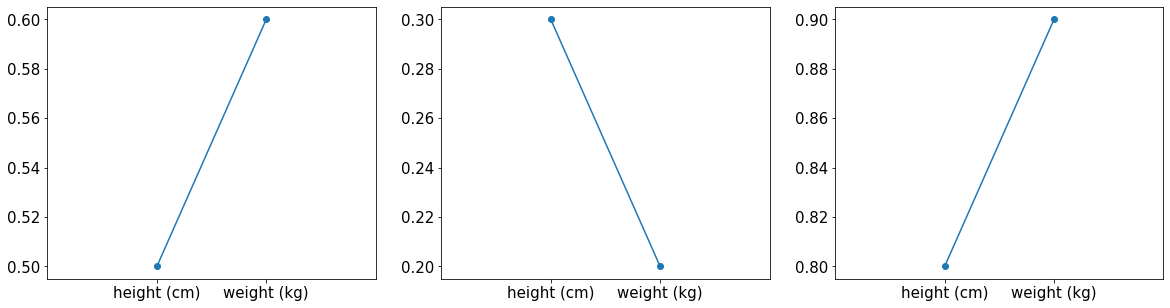

In [4]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs = axs.ravel()


x = [0,1]
ys = [[0.5,0.6],[0.3,0.2],[0.8,0.9]]

for ax,y in zip(axs,ys):
    ax.plot(x,y, marker='o')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['height (cm)', 'weight (kg)'])
    ax.set_xlim(-1,2)

plt.show()


To see how these samples correspond to samples on the plot above, consider the multivariate Gaussian:

$$ \begin{bmatrix} x_1 \\ x_2 \\ \end{bmatrix} \sim \mathcal{N}\bigg(\mathbf{\mu} = \begin{bmatrix}0.3 \\ 0.6 \\ \end{bmatrix}, \mathbf{\Sigma} = \begin{bmatrix}1&0.9 \\ 0.9 & 1 \\\end{bmatrix}\bigg)$$ 

Now we can take a sample, and picture the sample in two ways:

Sample: 
	 x1:  [0.17675597]
	 x2:  [0.68812268]


/Users/jackturner/mambaforge/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


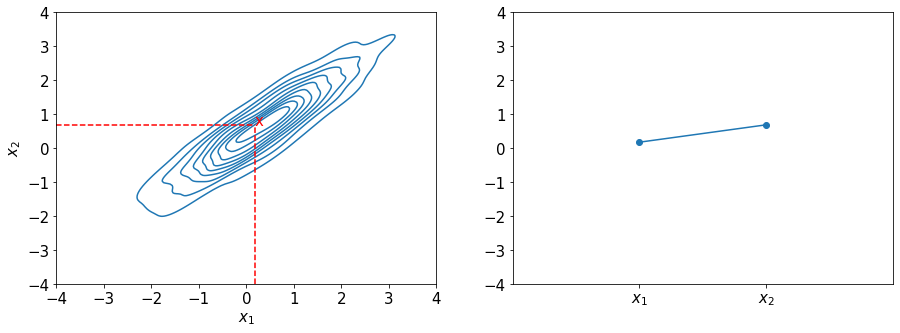

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

### Positive covariance
mean = [0.3,0.6]
cov  = [[1,.9],[.9,1]]  

# set up a Gaussian
x, y = np.random.multivariate_normal(mean, cov, 1000).T
s_x, s_y = np.random.multivariate_normal(mean, cov, 1).T # take a sample

print('Sample: ')
print('\t x1: ',s_x)
print('\t x2: ',s_y)

##### plotting code
## first way to visualise
sns.kdeplot(x,y,ax=ax[0])

ax[0].plot([s_x]*10, np.linspace(-4,s_y,10), linestyle='--',color='red')
ax[0].plot(np.linspace(-4,s_x,10), [s_y]*10, linestyle='--',color='red')
ax[0].annotate('x',(s_x,s_y),color='red')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_xlim(-4,4)
ax[0].set_ylim(-4,4)

## second way to visualise
ax[1].plot([0,1],[s_x,s_y],marker='o')
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['$x_1$','$x_2$'])
ax[1].set_xlim(-1,2)
ax[1].set_ylim(-4,4)

plt.show()


### Generalising to more variables

Imagine now that we add a third variable into the mix: $x_3$. In our population model, this could be something like shoe size.

When designing our new covariance matrix, we decide that $x_3$ is quite related to $x2$, and a little less related to $x1$:

$$ \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \end{bmatrix} \sim \mathcal{N}\Bigg(\mathbf{\mu} = \begin{bmatrix}0.3 \\ 0.6 \\ 0.4 \\ \end{bmatrix}, \mathbf{\Sigma} = \begin{bmatrix}1&0.9&0.8 \\ 0.9 & 1 & 0.9 \\ 0.8 & 0.9 & 1 \\  \end{bmatrix}\Bigg)$$ 


With three variables, this is a little tricky to visualise sampling the old way, but very natural in our new way:


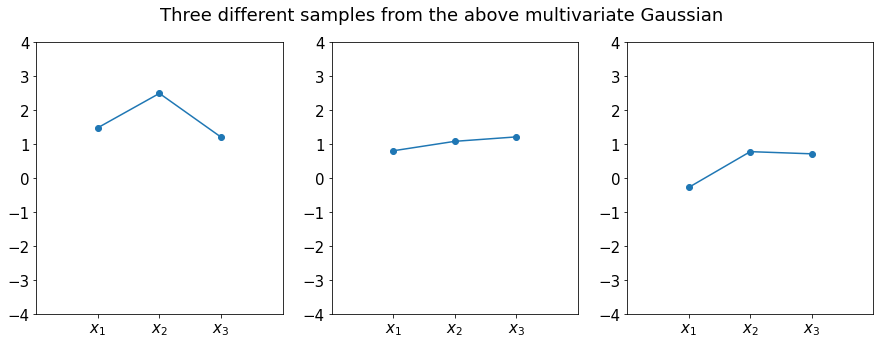

In [6]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

mean = [0.3,0.6,0.4]

cov  = [[1., .9, .8],
        [.9, 1., .9],
        [.8, .9, 1.]]

for ax in axs.ravel():
    x1,x2,x3 = np.random.multivariate_normal(mean, cov, 1).T
    ax.plot([1,2,3],[x1,x2,x3], marker='o')
    ax.set_xlim(0,4)
    ax.set_ylim(-4,4)
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['$x_1$','$x_2$','$x_3$'])

    
fig.suptitle('Three different samples from the above multivariate Gaussian')
plt.show()

Or even more:

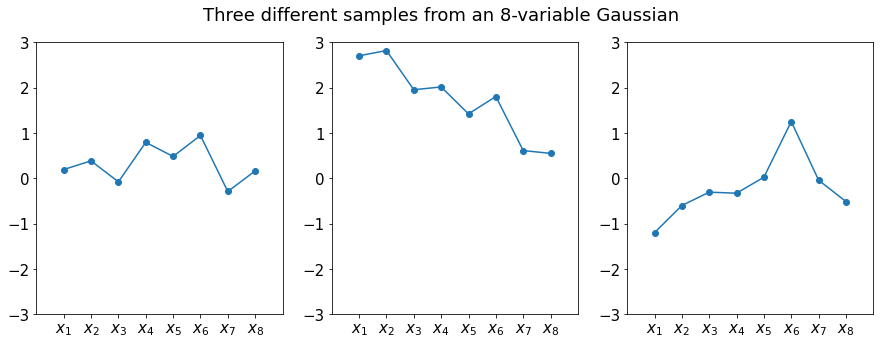

In [7]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

mean = [0.3,0.6,0.4,0.5,0.7,0.9,0.1,0.5]

cov  = [[1., .9, .8, .7, .6, .5, .4, .3],
        [.9, 1., .9, .8, .7, .6, .5, .4],
        [.8, .9, 1., .9, .8, .7, .6, .5],
        [.7, .8, .9, 1., .9, .8, .7, .6],
        [.6, .7, .8, .9, 1., .9, .8, .7],
        [.5, .6, .7, .8, .9, 1., .9, .8],
        [.4, .5, .6, .7, .8, .9, 1., .9],
        [.3, .4, .5, .6, .7, .8, .9, 1.]]

for ax in axs.ravel():
    xs = np.random.multivariate_normal(mean, cov, 1).T
    ax.plot(list(range(len(xs))),xs, marker='o')
    
    ax.set_xlim(-1,8)
    ax.set_ylim(-3,3)
    ax.set_xticks(list(range(len(xs))))
    ax.set_xticklabels(['$x_1$','$x_2$','$x_3$','$x_4$','$x_5$','$x_6$','$x_7$','$x_8$'])

    
fig.suptitle('Three different samples from an 8-variable Gaussian')
plt.show()

We can generalise this to as many dimensions as we want, and since we're scaling up, I'm going to make use of `sklearn` from now on. 

Let's start by picturing a 1000 dimension multivariate Gaussian. The mean vector, $\mathbf{\mu}$, is just a vector with 1000 elements. The covariance matrix can be visualised as: 

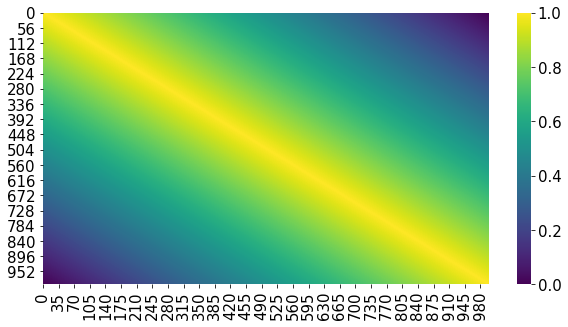

In [8]:
mean  = [0.5]*1000

## the below lines of code are to automatically generate the covariance matrix
## we create the first row, and then we build a symmetric matrix beneath it 
## it's not necessary to understand how this works 
cov_a = np.linspace(1, 0., 1000)
I   = np.arange(cov_a.size)
cov = cov_a[np.abs(I - I[:,None])]

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cov, cmap="viridis", ax=ax)
plt.show()

This is exactly the same as the covariance matrices we had above, just pictured as a heatmap because there are too many numbers to print exactly. The diagonal is all $1$s, and the further away from the diagonal we get, the lower the values become.

Now that we are equipped with a mean vector and a covariance matrix, we can draw some samples:

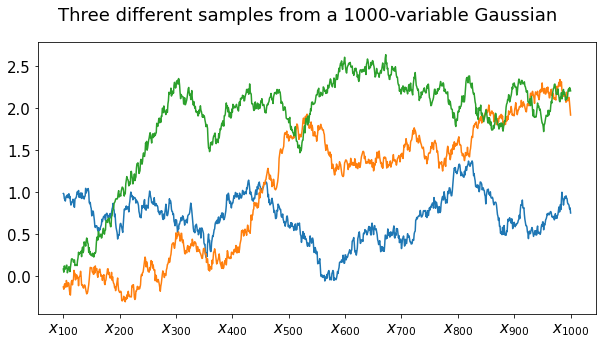

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

s_1 = np.random.multivariate_normal(mean, cov, 1).T
s_2 = np.random.multivariate_normal(mean, cov, 1).T
s_3 = np.random.multivariate_normal(mean, cov, 1).T

ax.plot(list(range(len(s_1))),s_1)
ax.plot(list(range(len(s_2))),s_2)
ax.plot(list(range(len(s_3))),s_3)

ax.set_xticks(np.linspace(0,999,10))
ax.set_xticklabels(['$x_{100}$','$x_{200}$','$x_{300}$','$x_{400}$','$x_{500}$','$x_{600}$','$x_{700}$','$x_{800}$','$x_{900}$','$x_{1000}$'])

    
fig.suptitle('Three different samples from a 1000-variable Gaussian')
plt.show()

These turn out to be samples of possible functions from our covariance matrix. We can condition them on specific points by freezing a few of the $x$ values and sampling the rest. 

How do we do this conditioning?

## Conditioning multivariate Gaussians 

Imagine we have some data $\mathbf{X}$ some labels for the data, $\mathbf{y}$, a covariance function $K(\circ,\circ)$. We choose to model $\mathbf{X}$ with a model $f \sim \mathcal{N}(\mu, \Sigma)$. We get some new, unlabelled data, $\mathbf{X_{*}}$, which we can incorporate into our model:

$$ \begin{bmatrix}f \\ f_* \\ \end{bmatrix} \sim
\mathcal{N}\bigg(\begin{bmatrix}\mu \\ \mu_* \\ \end{bmatrix}, 
\begin{bmatrix} K & K_* \\ K_* & K_{**} \end{bmatrix} \bigg)
$$

where $K_* = K(X, X_*)$ and $K_{**} = K(X_*, X_*)$.

To get the distribution over functions that could have produced our *test set*, we can then directly use:

$$ f^* \sim \mathcal{N}(\mu_*, \Sigma_*) $$

The formulae for $\mu_*, \Sigma*$  are given by the standard rules for Gaussians:

$ \mu_*    = K_{*}(K+\sigma^2_y I)^{-1}y$  
$ \Sigma_* = K_{**} - K_*^T (K+\sigma^2_y I)^{-1} K_* $

## Toy example

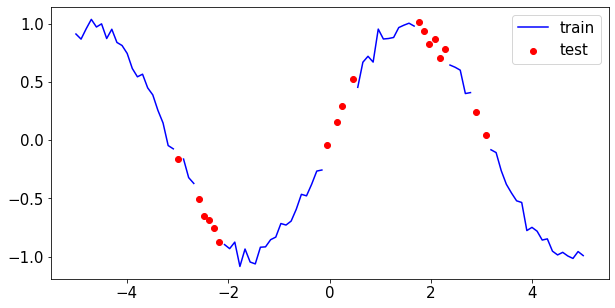

In [10]:
from sklearn.model_selection import train_test_split

noise = 0.05

x = np.linspace(-5.,5.,100)
y = np.sin(x) + np.random.normal(0,noise,100) # add a little noise

#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

## split into training and test
test_indices  = [20,24,25,26,27,28,49,51,52,54,67,68,69,70,71,72,78,80]
train_indices = [i for i in range(100) if i not in test_indices]

X_train, y_train = x[train_indices], y[train_indices]
X_test, y_test   = x[test_indices], y[test_indices]

fig, ax = plt.subplots(figsize=(10,5))

y_train_with_nans = y
y_train_with_nans[test_indices] = np.nan

ax.plot(x, y_train_with_nans, label='train', color='blue')
ax.scatter(X_test, y_test,label='test', marker='o', color='red')
ax.legend()
plt.show()

So we are going to fit the Gaussian process to the blue points and then try to guess for the red points.

In [11]:
## RBF covariance kernel function
def kernel(a,b,param=.1):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    k = np.exp(-.5 * (1/param) * sqdist)
    return k

Let's first calculate $\mu_*$, using the formula:

$ \mu_*    = K_{*}(K+\sigma^2_y I)^{-1}y$  

I'm going to assume that the `noise` parameter $\sigma^2_y$ is known, but in practice we may need to optimise this via gradient-based methods. 

In [12]:
X_train, X_test = np.array(X_train).reshape(-1,1), np.array(X_test).reshape(-1, 1)

K    = kernel(X_train, X_train)
K_s  = kernel(X_train, X_test)
K_ss = kernel(X_test, X_test)

M = K + np.dot(noise, np.eye(len(X_train)))
mu_s = np.dot(kernel(X_test, X_train), np.dot(np.linalg.inv(M),y_train))

And now, 
$ \Sigma_* = K_{**} - K_*^T (K+\sigma^2_y I)^{-1} K_* $

In [13]:
Sigma_s = K_ss - np.dot(K_s.T, np.dot(np.linalg.inv(M), K_s))

And now we can make predictions (by inspecting the mean of the distribution) at our test points! 

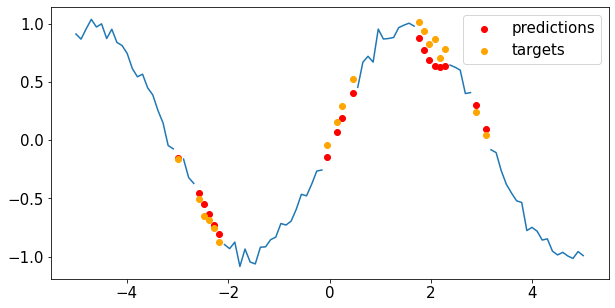

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y)
ax.scatter(X_test, mu_s, color='red', label='predictions')
ax.scatter(X_test, y_test, color='orange',label='targets')
ax.legend()
plt.show()

One of the other nice things we can do with Gaussian Processes is inspect the diagonal of the covariance matrix to get uncertainty estimates (i.e. a variance spanning the possible values) at each of the locations.

That is to say, as well as predicting a mean, we also predict a variance: 

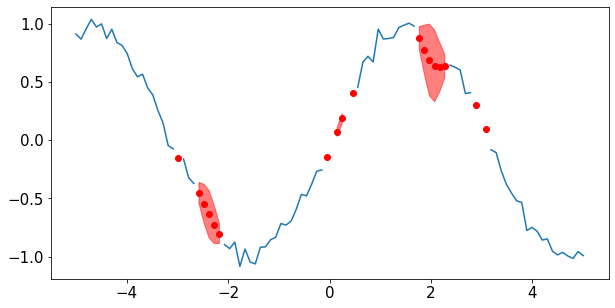

In [15]:
## this is all plotting code

preds = []
lower, upper = [], []
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x,y)

## remove predictions at the training points
lowers_with_nans = []
uppers_with_nans = []

j=0
for i, loc in enumerate(x):
    if loc not in X_test:
        preds.append(np.nan)
        lowers_with_nans.append(np.nan)
        uppers_with_nans.append(np.nan)
    else:
        m = mu_s[j]
        preds.append(m)
        lowers_with_nans.append(m-Sigma_s[j,j])
        uppers_with_nans.append(m+Sigma_s[j,j]) # we fetch the diagonal of the covariance matrix 
        j+=1

ax.scatter(x, preds, color='red', label='predictions')
ax.fill_between(x, lowers_with_nans, uppers_with_nans, color='red', alpha=0.5)

plt.show()

Inverting the covariance matrix `np.linalg.inv(K)` is an extremely expensive option, and is often the main practical obstacle to applying Gaussian Processes to real world data. 